In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [12]:
#randomforest regression

In [13]:
train.head()
#test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [16]:
train.isnull().sum()[train.isnull().sum()>0]
#print(train.info)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [17]:

train=train.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)
test=test.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1)

In [18]:
corr=train.corr()
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5]),
 <a list of 38 Text major ticklabel objects>)

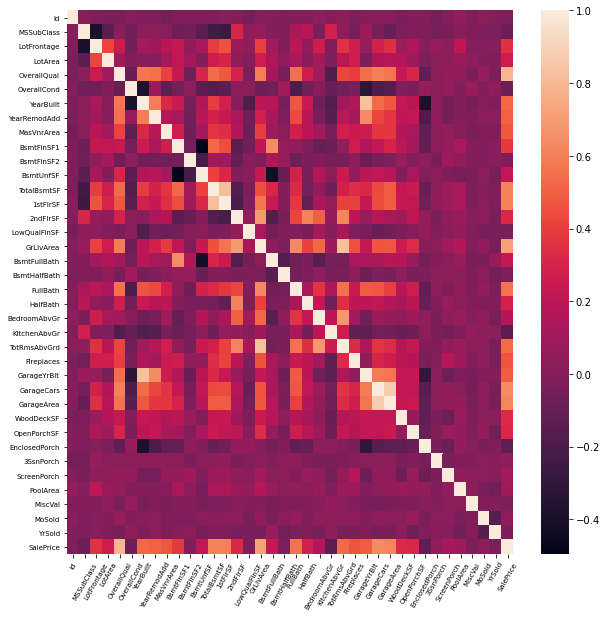

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.xticks(rotation=60, size=7)
plt.yticks(rotation=0, size=7)

#퀴즈
#각 컬럼과 salesprice 컬럼간의 상관계수가 0.5보다 큰 데이터에 대해 히트맵으로 출력하시오

In [32]:
corr.SalePrice

#퀴즈1.
#SalePrice 값을 기준으로 내림차순 정렬하고, 가장 큰값에 해당하는 10개의 feature 명을 출력

"""
상관계수의 절대값의 크기는 직선관계에 가까운 정도
부호는 직선관계의 방향
corr>0 => 점들이 우상향방향으로 띠를 형성, 직선 기울기 양수
corr<0 => 점들이 우하향방향으로 띠를 형성, 직선 기울기 음수

자료 형태 : 양적/질적 자료
양적 자료 : 수치형 자료 => 연속형, 이산형 자료로 구분
질적 자료 : 범주형 자료 => 명목형, 순서형 자료로 구분

1) 수치형
연속형? 값이 끊어지지 않고 연속적으로 이어지는 자료(키, 몸무게 등)
이산형? 정수로 나누어지는 자료(수술 횟수 등)

2) 범주형
명목형? 범주들 간에 순서적인 의미가 없는 자료(혈액형 등)
순서형? 범주들 간에 순서적인 의미가 있는 자료(학점, 아주좋음,좋음,보통... 등)

상관계수는 자료 형태에 따라 종류가 나누어짐

1)피어슨 상관계수(모수적 방법) : 연속형 & 연속형 상관계수
-두 변수가 모두 정규성을 따른다는 가정이 필요(모수적 방법)

모수?모집단 통계치(평균, 표준편차, 분산 등)

모수적 방법? ( 피어슨 상관분석)
중심극한정리? 모집단에서 표본크기가 n인 표본(30개 이상)을 여러 번 추출(예:100번 추출)했을때

표본평균분포 : 1번째 추출:표본평균, ... 100번째 추출:표본 평균 들이 이루는 분포
중심극한정리는 표본의 크기가 커질수록(30개 이상), 표본 평균들이 이루는 분포가 모집단의 평균과
모집단의 표준편차가 정규분포에 가까워진다는 정리

2)
비모수적 방법? (스피어만 상관분석, 켄달)
정규분포를 따르지 않는다고 증명 or 표본이 (30개 미만, 10개 미만) 소규모인 경우에는 정규분포임을
가정할 수 없을때 비모수적 방법을 사용.
자료를 크기 순으로 배열 -> 순위(서열) 매김 -> 순위 합계를 구해서 합계간의 차이를 비교


3)
명목형(이산형)&명목형(이산형) : 파이계수
두 변수가 모두 binary일때 두 변수간의 상관 계수


|상관계수|
0.7이상 => 상관관계가 매우 강함
0.3이상 => 상관관계가 있음
0.1~0.3 => 매우 약한 상관관계가 있음
0~0.1 => 무상관

척도? 변수 값을 표현하는 수준
명명척도(혈액형), 서열척도(순서형,직급), 등간척도(순서 & 간격 일정, 연산 가능)

"""
corr.SalePrice.sort_values(ascending = False)[1:11]
corr.SalePrice[np.argsort(-corr.SalePrice)][1:11]
corr.SalePrice.sort_values(axis=0,ascending=False)[1:11]





OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

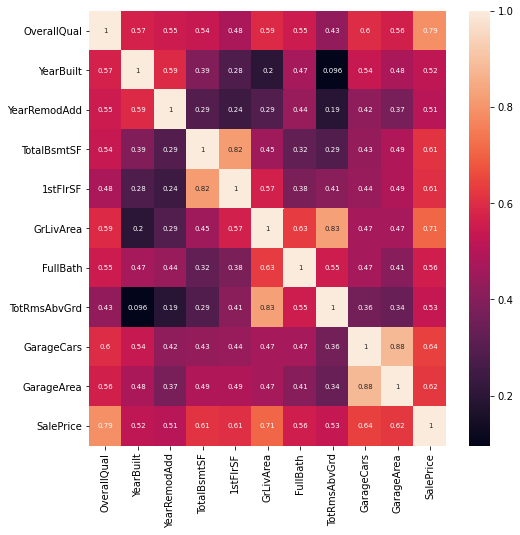

In [110]:
rev=corr.SalePrice[corr.SalePrice>0.5]
rev
rev_cols=list(rev.index.values)
rev_cols

corr2=train[rev_cols].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr2, annot=True, annot_kws={'size':7})

In [111]:
import numpy as np
corr=train.corr()
corrsales=corr[np.abs(corr['SalePrice'])>0.5].index
train=pd.DataFrame(train, columns=corrsales)
corr=train.corr()
corr

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000000,0.572323,0.550684,0.537808,0.476224,0.593007,0.550600,0.427452,0.600671,0.562022,0.790982
YearBuilt,0.572323,1.000000,0.592855,0.391452,0.281986,0.199010,0.468271,0.095589,0.537850,0.478954,0.522897
YearRemodAdd,0.550684,0.592855,1.000000,0.291066,0.240379,0.287389,0.439046,0.191740,0.420622,0.371600,0.507101
TotalBsmtSF,0.537808,0.391452,0.291066,1.000000,0.819530,0.454868,0.323722,0.285573,0.434585,0.486665,0.613581
1stFlrSF,0.476224,0.281986,0.240379,0.819530,1.000000,0.566024,0.380637,0.409516,0.439317,0.489782,0.605852
GrLivArea,0.593007,0.199010,0.287389,0.454868,0.566024,1.000000,0.630012,0.825489,0.467247,0.468997,0.708624
FullBath,0.550600,0.468271,0.439046,0.323722,0.380637,0.630012,1.000000,0.554784,0.469672,0.405656,0.560664
TotRmsAbvGrd,0.427452,0.095589,0.191740,0.285573,0.409516,0.825489,0.554784,1.000000,0.362289,0.337822,0.533723
GarageCars,0.600671,0.537850,0.420622,0.434585,0.439317,0.467247,0.469672,0.362289,1.000000,0.882475,0.640409
GarageArea,0.562022,0.478954,0.371600,0.486665,0.489782,0.468997,0.405656,0.337822,0.882475,1.000000,0.623431


In [121]:
rel_vars=corr.SalePrice[corr.SalePrice>0.5]
rel_cols=list(rel_vars.index.values)

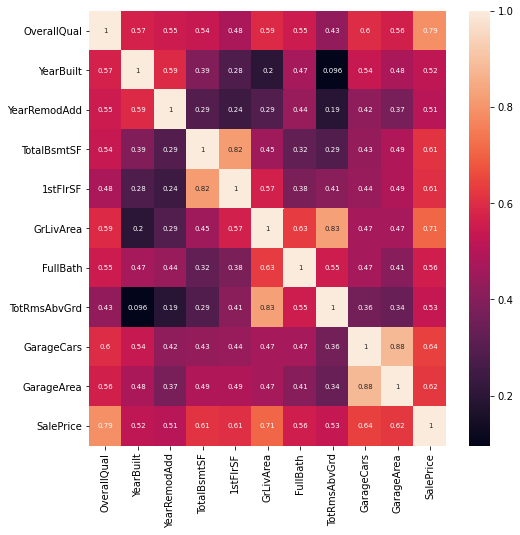

In [126]:
corr2=train[rel_cols].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr2, annot=True, annot_kws={'size':7})

In [127]:
train

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


In [132]:
x=train[rel_cols[:-1]].values
y=train.iloc[:,-1].values

In [140]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.2, random_state=0)

In [141]:
print(len(xtrain))
print(len(xtest))
print(len(ytrain))
print(len(ytest))


1168
292
1168
292


In [144]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
model=RandomForestRegressor(n_estimators=300, random_state=0)
model.fit(xtrain,ytrain)

RandomForestRegressor(n_estimators=300, random_state=0)

In [146]:
model.score(xtrain,ytrain)

0.9769987133158753

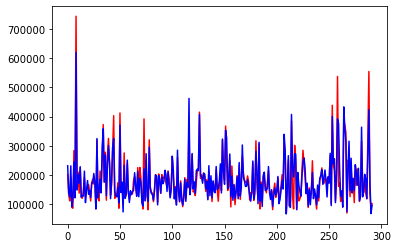

In [148]:
ypred=model.predict(xtest)
plt.plot(ytest, color='red')
plt.plot(ypred, color='blue')

In [149]:
#연습문제 1. 
#위 코드로 부터 예측값을 캐글 제출

In [150]:
################################################
################ 데이터 전처리 #################
################################################

In [152]:
df=pd.read_csv("train.csv")
df.columns
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

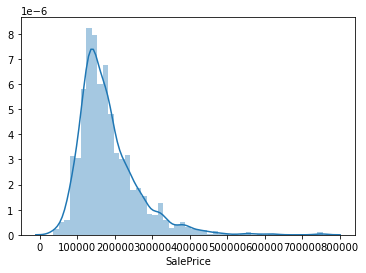

In [153]:
sns.distplot(df['SalePrice'])

In [154]:
#왜도와 첨도
print("왜도:%f" % df['SalePrice'].skew())
print("첨도:%f" % df['SalePrice'].kurt())

왜도:1.882876
첨도:6.536282


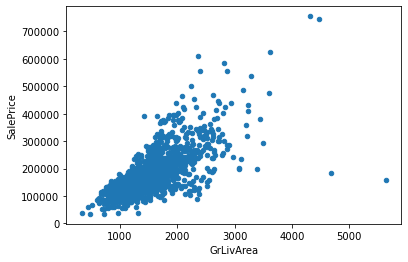

In [159]:
var='GrLivArea'
data=pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice')

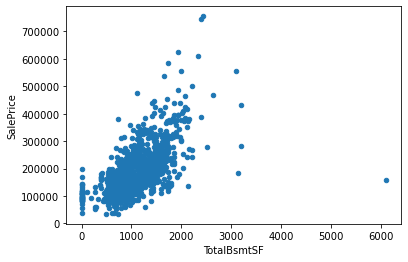

In [160]:
var='TotalBsmtSF'
data=pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice')

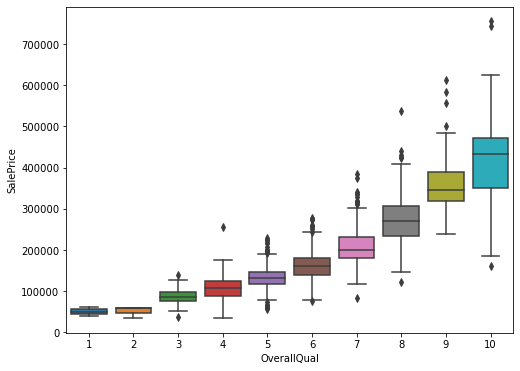

In [161]:
#범주형 변수와 세일프라이스 간의 관계 시각화 ->  boxplot
var='OverallQual'
data=pd.concat([df['SalePrice'],df[var]],axis=1)
f, ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var, y='SalePrice', data=data)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

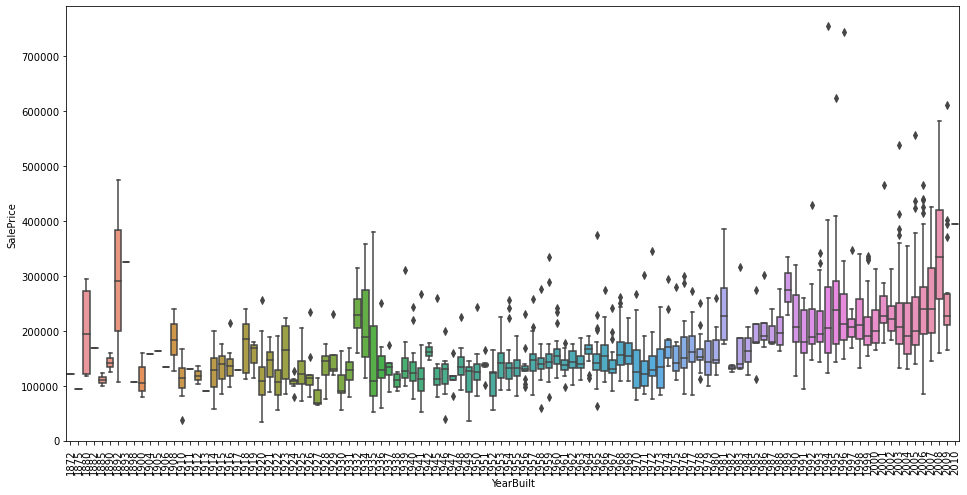

In [163]:
#범주형 변수와 세일프라이스 간의 관계 시각화 ->  boxplot
var='YearBuilt'
data=pd.concat([df['SalePrice'],df[var]],axis=1)
f, ax=plt.subplots(figsize=(16,8))
fig=sns.boxplot(x=var, y='SalePrice', data=data)
plt.xticks(rotation=90)

In [167]:
#상관행렬
corrmat=df.corr()
k=10 #히트맵에 출력할 변수의 개수

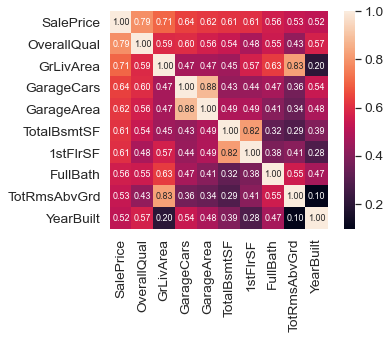

In [182]:
cols=corrmat.nlargest(k,'SalePrice')['SalePrice'].index

#넘파이 피어슨 상관계수 : numpy.corrcoef()
cm=np.corrcoef(df[cols].T)
sns.set(font_scale=1.25)
sns.heatmap(cm, annot=True, square=True, annot_kws={'size':9}, xticklabels=cols.values,
           yticklabels=cols.values, fmt='.2f')

In [183]:
sns.set() #default seaborn 옵션 설정

In [184]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

C:\Users\i\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


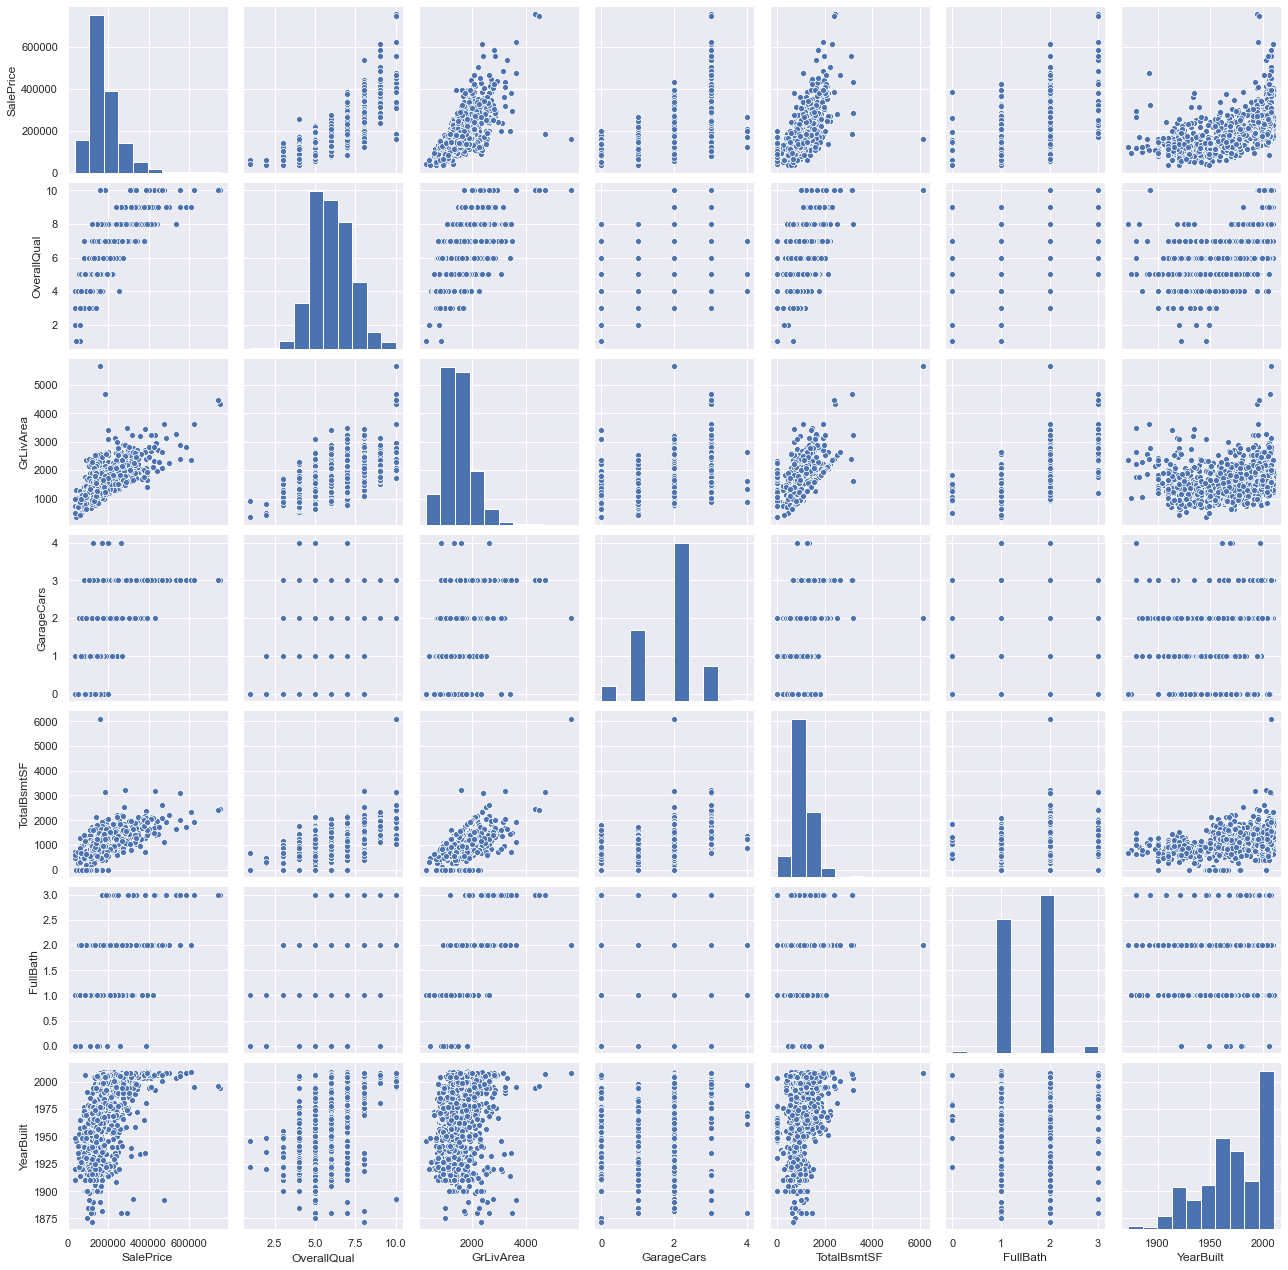

In [185]:
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df[cols], size=2.5)

In [186]:
####결측치처리####

In [208]:
total=df.isnull().sum().sort_values(ascending=False)
total
#퀴즈 2
# 데이터프레임 출력
#                  Total    Percent
# PoolQC           1453      0.995
# MiscFeature      1406      0.96
# ...
# Id                  0        0

percent=(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


In [200]:
#pd.concat([total,total/df.shape[0]],axis=1)

In [214]:
df=df.drop((missing_data[missing_data['Total']>1]).index,1) #열 제거

In [219]:
#df.info()

df.loc[df['Electrical'].isnull()]

df=df.drop(df.loc[df['Electrical'].isnull()].index) #결측치에 해당되는 행 제거

In [223]:
#df.info()
df.isnull().sum().max()

0

In [229]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler
saleprice_scaled=StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis])
saleprice_scaled
#fit_transform함수는 2차원 데이터에 대해 변환(표준화)
#np.newaxis:새로운 축 추가(차원 증가)

# df['SalePrice']
# df['SalePrice'][:,np.newaxis]


array([[ 0.34704187],
       [ 0.0071701 ],
       [ 0.53585953],
       ...,
       [ 1.07713679],
       [-0.48847623],
       [-0.42081658]])

In [237]:
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

In [238]:
low_range

array([[-1.83820775],
       [-1.83303414],
       [-1.80044422],
       [-1.78282123],
       [-1.77400974],
       [-1.62295562],
       [-1.6166617 ],
       [-1.58519209],
       [-1.58519209],
       [-1.57269236]])

In [239]:
high_range

array([[3.82758058],
       [4.0395221 ],
       [4.49473628],
       [4.70872962],
       [4.728631  ],
       [5.06034585],
       [5.42191907],
       [5.58987866],
       [7.10041987],
       [7.22629831]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


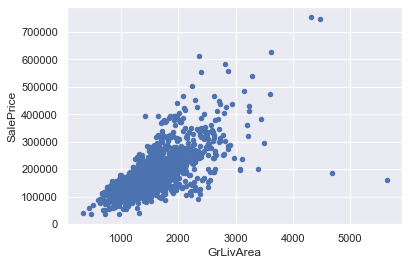

In [240]:
var='GrLivArea'
data=pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice')

In [247]:
df.sort_values(by='GrLivArea', ascending=False)[:2] #1299, 524
df=df.drop(df[df['Id']==1299].index)
df=df.drop(df[df['Id']==524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


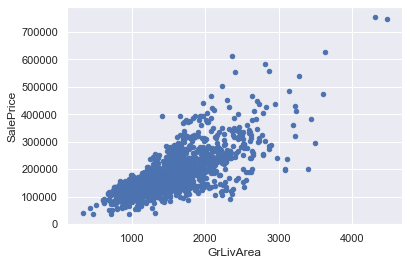

In [248]:
var='GrLivArea'
data=pd.concat([df['SalePrice'],df[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice')

In [257]:
from scipy.stats import norm
from scipy import stats

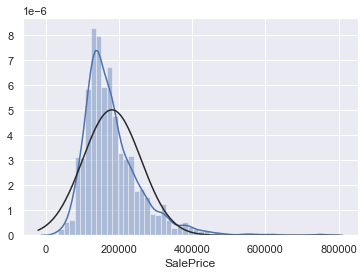

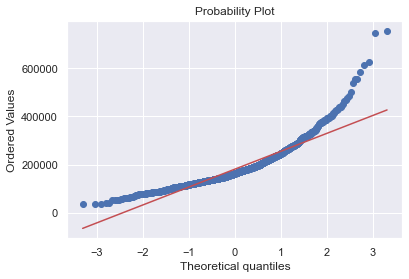

In [260]:
#정규분포?
sns.distplot(df['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(df['SalePrice'], plot=plt)

#파랑색 : 커널분포
#검은색 : 정규분포

In [261]:
df['SalePrice']=np.log(df['SalePrice'])

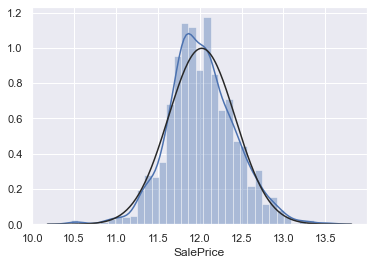

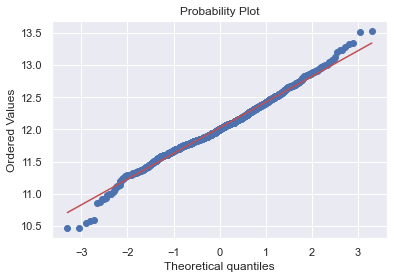

In [263]:
sns.distplot(df['SalePrice'], fit=norm)
fig=plt.figure()
res=stats.probplot(df['SalePrice'], plot=plt)

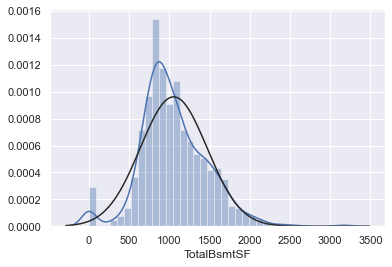

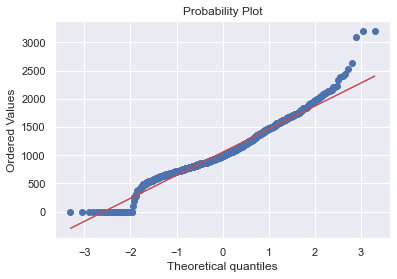

In [264]:
sns.distplot(df['TotalBsmtSF'], fit=norm)
fig=plt.figure()
res=stats.probplot(df['TotalBsmtSF'], plot=plt)

In [268]:
df['HasBsmt']=pd.Series(len(df['TotalBsmtSF']), index=df.index)
df['HasBsmt']=0

In [270]:
df['HasBsmt']
df.loc[df['TotalBsmtSF']>0, 'HasBsmt']=1

In [273]:
df['HasBsmt'].value_counts()

1    1418
0      37
Name: HasBsmt, dtype: int64

In [274]:
df.loc[df['HasBsmt']==1, 'TotalBsmtSF']=np.log(df['TotalBsmtSF'])

C:\Users\i\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


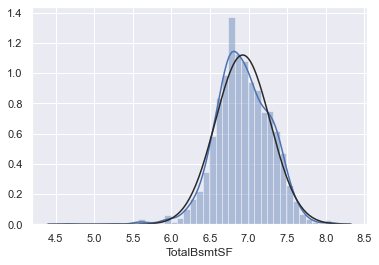

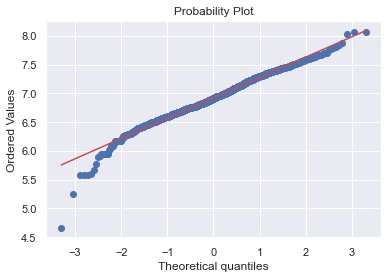

In [275]:
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'] , fit=norm)
fig=plt.figure()
res=stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1455 entries, 0 to 1459
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1455 non-null   int64  
 1   MSSubClass     1455 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1455 non-null   int64  
 4   Street         1455 non-null   object 
 5   LotShape       1455 non-null   object 
 6   LandContour    1455 non-null   object 
 7   Utilities      1455 non-null   object 
 8   LotConfig      1455 non-null   object 
 9   LandSlope      1455 non-null   object 
 10  Neighborhood   1455 non-null   object 
 11  Condition1     1455 non-null   object 
 12  Condition2     1455 non-null   object 
 13  BldgType       1455 non-null   object 
 14  HouseStyle     1455 non-null   object 
 15  OverallQual    1455 non-null   int64  
 16  OverallCond    1455 non-null   int64  
 17  YearBuilt      1455 non-null   int64  
 18  YearRemo

In [278]:
df['MSZoning'].value_counts()

RL         1148
RM          216
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
#object 데이터를 수치로 변환
#문자 -> 숫자 -> 가변수화

In [286]:
season=pd.DataFrame({'ss':['spr', 'sum', 'fal', 'wint', np.nan],
                     'ss2':['spr', 'sum', 'fal', 'wint', np.nan],
                    'num':[1,2,3,4,5]})
season.info()
pd.get_dummies(season) #비수치 데이터 -> 가변수화

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ss      4 non-null      object
 1   ss2     4 non-null      object
 2   num     5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 248.0+ bytes


,num,ss_fal,ss_spr,ss_sum,ss_wint,ss2_fal,ss2_spr,ss2_sum,ss2_wint
0,1,0,1,0,0,0,1,0,0
1,2,0,0,1,0,0,0,1,0
2,3,1,0,0,0,1,0,0,0
3,4,0,0,0,1,0,0,0,1
4,5,0,0,0,0,0,0,0,0


In [287]:
pd.get_dummies(season, dummy_na=True) 

,num,ss_fal,ss_spr,ss_sum,ss_wint,ss_nan,ss2_fal,ss2_spr,ss2_sum,ss2_wint,ss2_nan
0,1,0,1,0,0,0,0,1,0,0,0
1,2,0,0,1,0,0,0,0,1,0,0
2,3,1,0,0,0,0,1,0,0,0,0
3,4,0,0,0,1,0,0,0,0,1,0
4,5,0,0,0,0,1,0,0,0,0,1


In [288]:
df=pd.get_dummies(df)
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#추석 기간에...
#randomforest regressor 모델 -> 예측 -> 제출 -> 점수확인 -> 카페에 점수, 코드 업로드

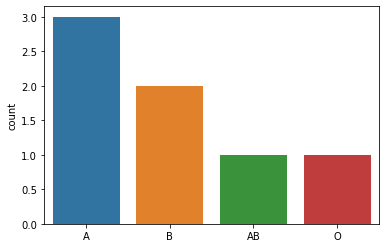

In [40]:
#범주형
bloodtype=['A','A','A','B','B','AB','O']
np.unique(bloodtype)
np.unique(bloodtype, return_counts=True)
#np.unique(bloodtype, return_counts=True)[1]
#np.unique(bloodtype, return_counts=True)[1][0]

pd.Series(bloodtype)
pd.Series(bloodtype).value_counts()

sns.countplot(bloodtype)


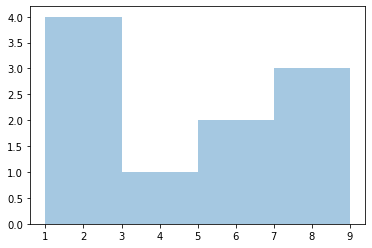

In [46]:
#연속형 변수
x=[1,1,1,2,3,5,5,7,8,9]

#데이터 범위를 4구간
hist, egdes=np.histogram(x,4) #구간 경계 : array([1., 3., 5., 7., 9.])
egdes
hist

sns.distplot(x, bins=4, kde=False)


In [51]:
#중심경향치(평균, 최빈수, 중앙값):자료 전체 대표
x=[100,100,200,400,500]
np.mean(x) #평균은 극단치(아웃라이어) 영향을 잘 받는다
#소득 분포처럼 비대칭인 자료에 대해서는 평균값이 자료를 대표하기 어려움
np.median(x) # 중위수는 극단치(아웃라이어) 영향을 잘 받지 않는다

from scipy.stats import mode
mode(x)

ModeResult(mode=array([100]), count=array([2]))

In [55]:
x=[1,1,1,2,3,5,5,7,8,9]
#흩어진 정도(분산, 표준편차, 사분위)
np.min(x)
np.max(x)-np.min(x) #자료 범위(자료의 퍼짐 정도)
#분산?평균으로부터 자료가 얼마나 벗어나 있는지를 나타내는 정도
#데이터-평균 -> 제곱 -> 평균
#분산이 큼? 데이터가 평균에서 많이 벗어나 있다
#분산이 작음? 데이터가 평균 주변에 모여 있다
np.var(x)

8.36

In [57]:
#표준편차?평균에서 데이터가 벗어난 정도를 수치화
#분산의 양의 제곱근
np.std(x)

np.sqrt(np.var(x))

2.891366458960192

In [ ]:
#IQR:3사분위수(Q3,75%) - 1사분위수(Q1,25%)
#사분위수:데이터를 오름차순 정렬 -> 4등분 -> 각 지점에 해당되는 값(1,2,3,4 사분위수)

In [58]:
x

[1, 1, 1, 2, 3, 5, 5, 7, 8, 9]

In [65]:
np.quantile(x, .25) #25%(1사분위수)
np.quantile(x, .5)
np.quantile(x, .75)
np.median(x)

#iqr
np.quantile(x, .75)-np.quantile(x, .25)

#대부분의 자료는 중심 부분에 많이 몰려있는 경향이 있음
#평균에서 표준편차의 k배 만큼 떨어져 있다 -> k 표준편차

#표준편차 : 평균에서 떨어진 정도 
#IQR : 중간값에서 벗어난 정도

5.25

In [73]:
#공분산(covariance) : 두 변수가 함께 변화하는 정도를 나타내는 지표
x=[7,3,6,6,9,4,3,9,3,5]
y=[6,2,4,6,10,5,1,8,4,5]

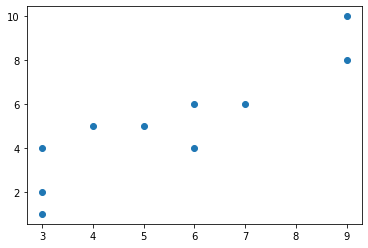

In [74]:
#산점도(scatter plot)
plt.plot(x,y, 'o')

In [75]:
print(np.cov(x,y))
print(np.cov(x,y)[0,1])

[[5.38888889 5.5       ]
 [5.5        6.98888889]]
5.5


In [76]:
np.var(x)

4.85

In [77]:
np.var(y)

6.290000000000001

In [ ]:
#공분산 해석:
#+: 두 변수가 같은 방향으로 변화
#-: 두 변수가 반대 방향으로 변화
#0:두 변수가 독립

#cov(x,y):5
#cov(a,b):1000

In [ ]:
#상관계수 : 두 변수가 함께 변하는 정도, -1~+1

In [88]:
#피어슨 상관계수(일반적)
np.corrcoef(x,y)
np.corrcoef(x,y)[0,1] #상관계수

0.8962083932927005

In [89]:
#x,y의 공분산
cov=np.cov(x,y)[0,1]
cov #5.5
xsd=np.std(x,ddof= 1)#x의 표본표준편차, 2.202271554554524
ysd=np.std(y,ddof= 1)#y의 표본표준편차, 2.507987240796891
cov/(xsd*ysd)

0.8962083932927002

In [ ]:
#상관계수를 제곱하면? 분산(변화량)에서 공유하는 비율
#ex) x,y의 상관계수가 0.7 -> 제곱하면 0.49(49%)
#49%? x의 분산중 49%를 y와 공유한다는 의미임. x의 분산 중 49%가 y 로 설명할 수 있음.

#피어슨 상관계수는 선형적인 관계 측정. 비선형적인 변화의 경우에는 잘 측정하지 못함

In [90]:
#스피어만 상관계수
#서열척도, 비선형적인 관계
import scipy.stats
scipy.stats.spearmanr(x,y).correlation

0.8972354465472708

In [91]:
scipy.stats.kendalltau(x,y).correlation
#켄달 상관계수: 비선형적 & 서열척도(표본이 작을때)

0.8051175601825398

In [ ]:
#상관계수 통계적 검증

In [93]:
x=[7,3,6,6,9,4,3,9,3,5]
y=[6,2,4,6,10,5,1,8,4,5]

In [94]:
import scipy.stats

In [95]:
scipy.stats.pearsonr(x,y)
#상관계수 : 0.89, p value : 0.0004

#p value? 0.05(임계치), p값이 0.05보다 작은경우 "통계적으로 유의미하다" 표현
"""
유의수준, 유의확률(p value), 귀무/대립 가설, 1종/2종 오류

귀무/대립 가설?

"20대 남자들의 키와 30대 남자들의 키가 다르다.""

20대와 30대 남자들 각 30명씩 -> 키 측정 -> 각 집단 평균(기술통계)

표본으로 추론 -> 추론 통계: 가설을 세우고 => 그 가설을 입증

귀무 가설 (처음 세운 가설) : 20대 남자들과 30대 남자들의 키가 같을 것이다
대립 가설 (실험자가 입증해야 하는 가설) : 20대 남자들의 키와 30대 남자들의 키가 다를 것이다

추론 통계 -> 귀무가설을 기각

ex) 가설 : 범죄자가 범인이라는 가설을 입증하고자 한다면 -> 귀무가설:"범죄자는 범인이 아니다.""
귀무가설을 기각(범죄자가 범인이다)하기 위해 임증 자료 수집함


실험자가 범할 수 있는 오류
1종 오류: 귀무가설이 참인데 기각한 경우(죄가 없는 범인이 죄가 있다고 말한 경우)
2종 오류: 귀무가설이 거짓인데 기각하지 않은 경우(죄가 있는 범인이 죄가 없다고 말한 경우)

1종(심각) >  2종

*유의 수준 : 1종 오류를 범할 수 있는 최대 허용 한계
ex) 유의수준 : 0.05(5%)로 정함 -> 100번 실험했을 때 1종 오류를 범할 수 있는 최대 허용 한계 5번
              => 정밀도 요구되는 실험 : 0.01(1%)
              
*유의 확률 : p - value,  1종 오류를 범할 확률
ex) 0.05(5%) : 100번 실험했을 때 1종 오류를 5번 범한 경우.
의미? 95% 신뢰도로 귀무가설을 기각한다는 의미
0 <= pvalue <= 1

* p-value값이 유의 수준(0.05)보다 낮다 -> 실험이 통계적으로 의미가 있다!!!

"""



(0.8962083932927005, 0.000447180524884891)

In [ ]:
"""
상관분석 고려 사항
-산점도(선형성(직선) 확인)
-곡선형?스피어만, 캔달 상관분석

-상관관계가 있다고 해서 반드시 인과관계가 있는 건 아니다.
ex)제 3변인의 문제
-서울에서 범죄 발생 건수와 종교 시설의 개수  => 양의 상관관계 
-극단치로 인한 인위적 상관관계 있을 수 있음
"""

In [ ]:
"""
회귀분석(regression) ? 독립변수(x)로 종속변수(y)를 예측하는 것
혼입변수?모델에는 포함되지 않지만, 종속변수에 영향을 주는 변수
선형회귀분석?독립변수와 종속변수 사이에 직선적인 형태의 관계가 있다고 가정하고 분석
회귀분석은 종속변수가 연속인 경우, 분류는 종속변수 범주인 경우

직선적인 형태? 독립변수가 증가 => 종속변수도 비례하여 증가 or 감소


선형회귀모델에서 x, y 관계 수식 : y=wx+b (w:weight, b:bias)
w:가중치 or 회귀계수, 
독립변수 x가 1증가하면 종속변수 y는 w만큼 증가한다

b:절편(독립변수가 0일때 종속변수 y의 값)


왜도? 데이터의 치우친 정도. 
중앙값 > 평균(오른쪽 길게 늘어진 경우): 왜도가 0보다 큰 양수
중앙값 < 평균(왼쪽 길게 늘어진 경우): 왜도가 0보다 작은 음수
좌우가 대칭(정규분포) : 왜도가 0

첨도? 자료의 분포가 뾰족한 정도
정규분포 : 첨도가 0 or 3
중간이 뾰족한 경우 : 첨도가 0(3)보다 큰 양수
중간이 평평한 경우 : 첨도가 0(3)보다 작은 음수
"""

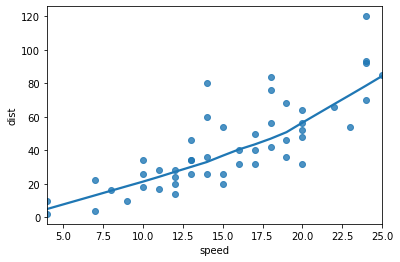

In [98]:
df=pd.read_csv("cars.csv")
df
#독립변수:speed, 종속변수:dist
#산점도 & 선형적인 패턴 확인
sns.regplot('speed', 'dist', lowess=True, data=df)

Text(0.5, 1.0, 'car dist')

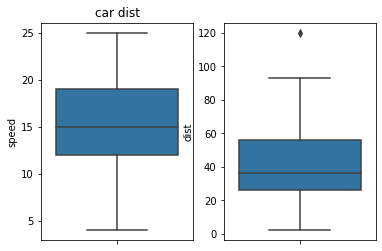

In [100]:
#박스플랏 -> 극단값 확인
fig, (ax1,ax2)=plt.subplots(1,2) #1행 2열

sns.boxplot('speed', data=df, ax=ax1, orient='v')
ax1.set_title('car speed')

sns.boxplot('dist', data=df, ax=ax2, orient='v')
ax1.set_title('car dist')

#극단값이 있음

In [101]:
#선형회귀분석 : 독립변수와 종속변수가 정규분포를 따를 때 잘 작동
#밀도 플랏 : 정규분포 형태 확인

Text(0.5, 1.0, 'car dist')

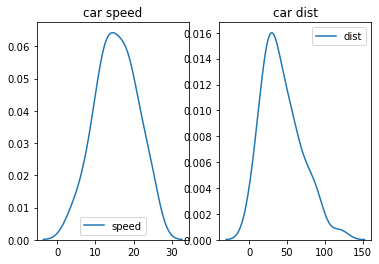

In [102]:
fig, (ax1,ax2)=plt.subplots(1,2) #1행 2열

sns.kdeplot(df['speed'], ax=ax1)
ax1.set_title('car speed')

sns.kdeplot(df['dist'], ax=ax2)
ax2.set_title('car dist')

In [104]:
scipy.stats.skew(df['speed'])
scipy.stats.skew(df['dist'])

0.7824835173114966

In [106]:
#회귀분석 함수 가져오기|
from statsmodels.formula.api import ols

In [108]:
res=ols("dist~speed",data=df).fit()#  종속변수 ~ 독립변수, 회귀 모델 생성

In [109]:
res.summary() #회귀 모델 요약 정보
"""
R-squared : 모델 설명력, dist의 분산을 speed가 약 65%를 설명

Prob (F-statistic) :1.49e-12 통계적 유의미함 ( p<0.05)

회귀계수 : 
dist=-17.5791 + 3.9324*speed

speed가 1증가하면, dist는 3.9324 증가한다


결론:
회귀분석 결과
dist에 대하여  speed 로 예측하는 회귀분석을 실시한 결과, 이 회귀모델은 통계적으로 유의미함
(F-statistic:89.57, p<0.05)

독립변수에 대하여 speed의 회귀계수는 3.9324로, dist에 대하여 유의미한 예측 변수라는 것이 나타남
p<0.05


"""


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Tue, 29 Sep 2020   Prob (F-statistic):           1.49e-12
Time:                        14:29:04   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""